In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("HR_comma_sep.csv")

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df["left"].unique()

array([1, 0])

In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
subdf = df[['satisfaction_level', 'average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [8]:
salary_dummies = pd.get_dummies(subdf.salary, prefix = 'salary').astype('int')
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [9]:
new_df = pd.concat([subdf,salary_dummies], axis = 1).drop(['salary'], axis = 1)
new_df.loc[5]

satisfaction_level         0.41
average_montly_hours     153.00
promotion_last_5years      0.00
salary_high                0.00
salary_low                 1.00
salary_medium              0.00
Name: 5, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [11]:
X = new_df
Y = df['left']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [31]:
model.fit(x_train, y_train)

LogisticRegression()

In [32]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
model.score(x_test, y_test)

0.7713333333333333

In [41]:
values = model.predict(x_test)
count = 0
for val in values:
    if(val == 1):
        count+=1
print(count)
print(len(x_test))

486
4500


In [42]:
y_train.shape

(10499,)

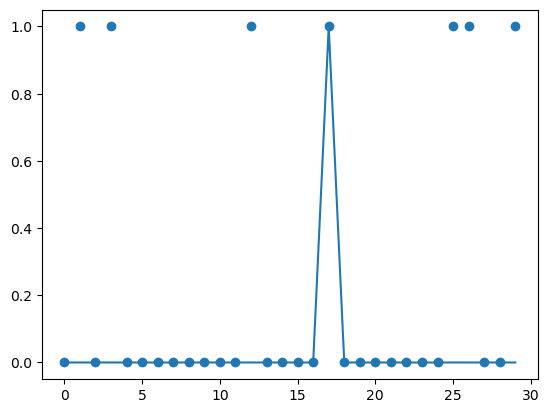

In [43]:
plt.scatter(range(30),y_train[ :30])
plt.plot(range(30), model.predict(x_train[ :30]))